In [4]:
import os
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve

In [5]:
##
os.chdir("D:\\av")

In [3]:
##reading the Data
train_data = pd.read_csv("train_20D8GL3.csv")
test_data = pd.read_csv("test_O6kKpvt.csv")

In [5]:
##
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
ID                            21000 non-null int64
LIMIT_BAL                     21000 non-null int64
SEX                           21000 non-null int64
EDUCATION                     21000 non-null int64
MARRIAGE                      21000 non-null int64
AGE                           21000 non-null int64
PAY_0                         21000 non-null int64
PAY_2                         21000 non-null int64
PAY_3                         21000 non-null int64
PAY_4                         21000 non-null int64
PAY_5                         21000 non-null int64
PAY_6                         21000 non-null int64
BILL_AMT1                     21000 non-null int64
BILL_AMT2                     21000 non-null int64
BILL_AMT3                     21000 non-null int64
BILL_AMT4                     21000 non-null int64
BILL_AMT5                     21000 non-null int64
BILL_AMT6               

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
ID           9000 non-null int64
LIMIT_BAL    9000 non-null int64
SEX          9000 non-null int64
EDUCATION    9000 non-null int64
MARRIAGE     9000 non-null int64
AGE          9000 non-null int64
PAY_0        9000 non-null int64
PAY_2        9000 non-null int64
PAY_3        9000 non-null int64
PAY_4        9000 non-null int64
PAY_5        9000 non-null int64
PAY_6        9000 non-null int64
BILL_AMT1    9000 non-null int64
BILL_AMT2    9000 non-null int64
BILL_AMT3    9000 non-null int64
BILL_AMT4    9000 non-null int64
BILL_AMT5    9000 non-null int64
BILL_AMT6    9000 non-null int64
PAY_AMT1     9000 non-null int64
PAY_AMT2     9000 non-null int64
PAY_AMT3     9000 non-null int64
PAY_AMT4     9000 non-null int64
PAY_AMT5     9000 non-null int64
PAY_AMT6     9000 non-null int64
dtypes: int64(24)
memory usage: 1.6 MB


In [7]:
train_data['default_payment_next_month'].value_counts()

0    16355
1     4645
Name: default_payment_next_month, dtype: int64

In [95]:
4645/16355

0.2840110058086212

In [8]:
y = train_data['default_payment_next_month'].copy()

In [9]:
cols = train_data.columns[:-1]
data = train_data[cols].copy()

In [12]:
data.head()
X = train_data.copy().drop(['default_payment_next_month','ID'], axis = 1)

In [13]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,2,2,1,41,0,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,-1,0,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [21]:
xgb = XGBClassifier(n_jobs = -1)

In [22]:
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 81.154%


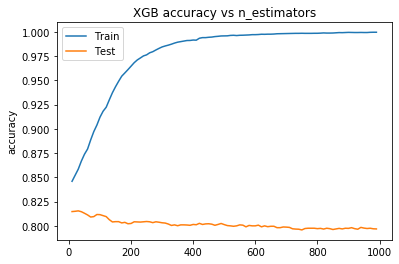

In [23]:
tree_list = np.arange(10, 1000, 10) # 500500 trees...
train = []
test = []

for tree in tree_list:
    xgb = XGBClassifier(n_estimators=tree, n_jobs = -1, random_state=42)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)
    trainpred = xgb.predict(X_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'n_estimators':tree_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs n_estimators')
plt.show()

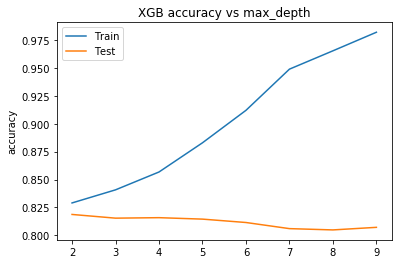

In [28]:
tree_list = np.arange(2, 10) 
train = []
test = []

for tree in tree_list:
    xgb = XGBClassifier(max_depth=tree, n_jobs = -1, random_state=42)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)
    trainpred = xgb.predict(X_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth':tree_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs max_depth')
plt.show()

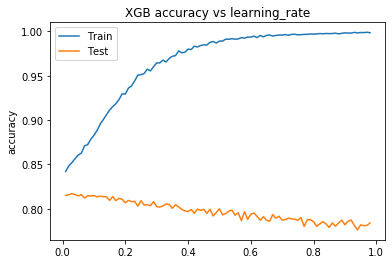

In [26]:
learn_list = np.arange(0.01, 0.99, 0.01) # About 20000 trees
train = []
test = []

for tree in learn_list:
    xgb = XGBClassifier(n_estimators=200, learning_rate=tree, n_jobs = -1, random_state=42)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)
    trainpred = xgb.predict(X_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'learning_rate':learn_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = learn_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs learning_rate')
plt.show()

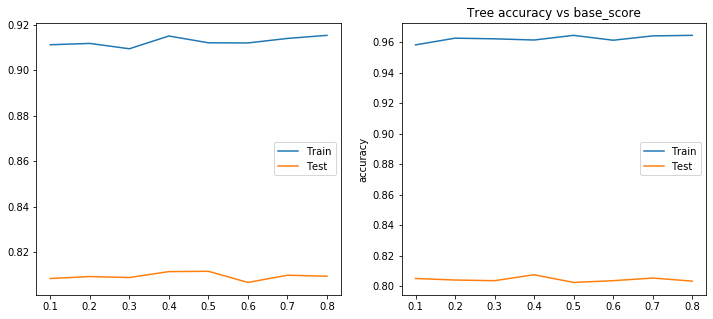

In [27]:
tree_list = np.arange(0.1, 0.9, 0.1)
train = []
test = []
train2 = []
test2 = []

for tree in tree_list:
    xgb = XGBClassifier(base_score=tree, n_jobs = -1, random_state=42)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)
    trainpred = xgb.predict(X_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    xgb = XGBClassifier(base_score=tree, n_estimators=200, n_jobs = -1, random_state=42)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)
    trainpred = xgb.predict(X_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train2.append(train_acc)
    test2.append(test_acc)
    
performance = pd.DataFrame({'base_score':tree_list,'Train_acc':train,'Test_acc':test})
performance2 = pd.DataFrame({'base_score':tree_list,'Train_acc':train2,'Test_acc':test2})

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

x_axis = tree_list
ax1.plot(x_axis, performance['Train_acc'], label='Train')
ax1.plot(x_axis, performance['Test_acc'], label='Test')
ax1.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs base_score')
ax2.plot(x_axis, performance2['Train_acc'], label='Train')
ax2.plot(x_axis, performance2['Test_acc'], label='Test')
ax2.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs base_score')
plt.show()

In [29]:
best_XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
best_XGB.fit(X_train, y_train)
prediction = best_XGB.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 81.861%


In [32]:
target_names = ['Not Default', 'Default']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      5420
     Default       0.66      0.35      0.45      1510

    accuracy                           0.82      6930
   macro avg       0.75      0.65      0.67      6930
weighted avg       0.80      0.82      0.80      6930



In [33]:
eval_set = [(X_train, y_train), (X_test, y_test)]

best_XGB.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

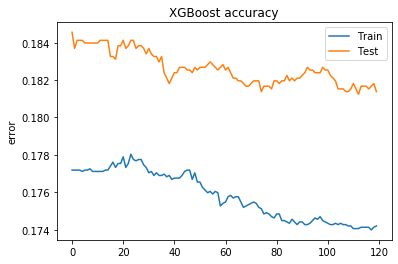

In [34]:
# retrieve performance metrics
results = best_XGB.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('error')
plt.title('XGBoost accuracy')
plt.show()

In [37]:
eval_set = [(X_test, y_test)]
best_XGB.fit(X_train, y_train, early_stopping_rounds=25, 
             eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18456
Will train until validation_0-error hasn't improved in 25 rounds.
[1]	validation_0-error:0.18369
[2]	validation_0-error:0.18413
[3]	validation_0-error:0.18413
[4]	validation_0-error:0.18413
[5]	validation_0-error:0.18398
[6]	validation_0-error:0.18398
[7]	validation_0-error:0.18398
[8]	validation_0-error:0.18398
[9]	validation_0-error:0.18398
[10]	validation_0-error:0.18398
[11]	validation_0-error:0.18413
[12]	validation_0-error:0.18413
[13]	validation_0-error:0.18413
[14]	validation_0-error:0.18413
[15]	validation_0-error:0.18326
[16]	validation_0-error:0.18326
[17]	validation_0-error:0.18312
[18]	validation_0-error:0.18384
[19]	validation_0-error:0.18384
[20]	validation_0-error:0.18413
[21]	validation_0-error:0.18369
[22]	validation_0-error:0.18384
[23]	validation_0-error:0.18413
[24]	validation_0-error:0.18413
[25]	validation_0-error:0.18369
[26]	validation_0-error:0.18384
[27]	validation_0-error:0.18384
[28]	validation_0-error:0.18369
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [38]:
best_XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=38,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [39]:
best_XGB.fit(X_train, y_train)
prediction = best_XGB.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 81.789%


In [41]:
##finalprediction
ID_test = test_data['ID'].copy()
prediction_2 = best_XGB.predict(test_data.copy().drop('ID', axis = 1))

In [42]:
prediction_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
submission = pd.DataFrame({'ID':ID_test, 'default_payment_next_month':prediction_2})

In [44]:
submission.head()

,ID,default_payment_next_month
0,10178,0
1,5304,0
2,5187,0
3,14495,0
4,20444,0


In [46]:
submission.to_csv('submission.csv',index=False)

In [47]:
from sklearn.svm import SVC

In [48]:
SVM_Model = SVC(gamma='auto')

In [51]:
SVM_Model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
print (f'Accuracy - : {SVM_Model.score(X,y):.3f}')

Accuracy - : 0.924


In [53]:
prediction = SVM_Model.predict(X_test)
target_names = ['Not Default', 'Default']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Default       0.78      1.00      0.88      5420
     Default       0.42      0.01      0.02      1510

    accuracy                           0.78      6930
   macro avg       0.60      0.50      0.45      6930
weighted avg       0.70      0.78      0.69      6930



In [56]:
##finalprediction
ID_test = test_data['ID'].copy()
prediction_2 = SVM_Model.predict(test_data.copy().drop('ID', axis = 1))
submission = pd.DataFrame({'ID':ID_test, 'default_payment_next_month':prediction_2})
submission.to_csv('submission_svm.csv',index=False)

## runthisbit

In [60]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

# below needs to be true

In [ ]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

In [63]:
h2o.init()

# Import a sample binary outcome train/test set into H2O
train_h2o = h2o.import_file("train_20D8GL3.csv")
test_h2o = h2o.import_file("test_O6kKpvt.csv")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\guddu\AppData\Local\Temp\tmpk6oh4_hw
  JVM stdout: C:\Users\guddu\AppData\Local\Temp\tmpk6oh4_hw\h2o_guddu_started_from_python.out
  JVM stderr: C:\Users\guddu\AppData\Local\Temp\tmpk6oh4_hw\h2o_guddu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_guddu_0qbza0
H2O cluster total nodes:,1
H2O cluster free memory:,3.988 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [65]:
x = train_h2o.columns
y = "default_payment_next_month"
z = 'ID'

In [66]:
x.remove(y)
x.remove(z)

In [69]:
train_h2o[y] = train_h2o[y].asfactor()
train_h2o[y] = train_h2o[y].asfactor()

In [70]:
aml = H2OAutoML(max_models=30, seed=1)

In [72]:
aml.train(x=x, y=y, training_frame=train_h2o)

AutoML progress: |
16:28:48.748: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [73]:
lb = aml.leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

In [74]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200322_162848,0.786434,0.427928,0.561966,0.282571,0.365854,0.13385,4500,0.248861
StackedEnsemble_BestOfFamily_AutoML_20200322_162848,0.785586,0.428531,0.561873,0.284454,0.36611,0.134037,1315,0.052105
GBM_grid__1_AutoML_20200322_162848_model_5,0.785181,0.427008,0.558473,0.281891,0.365812,0.133818,547,0.002565
GBM_grid__1_AutoML_20200322_162848_model_11,0.784972,0.439622,0.555125,0.284518,0.371777,0.138218,2004,0.005311
GBM_grid__1_AutoML_20200322_162848_model_6,0.78459,0.426175,0.555853,0.290763,0.365539,0.133619,637,0.003932
GBM_grid__1_AutoML_20200322_162848_model_10,0.784564,0.448283,0.553389,0.286173,0.376175,0.141507,2058,0.005771
GBM_5_AutoML_20200322_162848,0.783351,0.427478,0.553066,0.28446,0.366015,0.133967,649,0.002196
GBM_1_AutoML_20200322_162848,0.782404,0.427596,0.556852,0.289944,0.366186,0.134092,674,0.002053
GBM_2_AutoML_20200322_162848,0.782055,0.42877,0.550374,0.289894,0.366787,0.134533,463,0.001972
GBM_grid__1_AutoML_20200322_162848_model_8,0.781772,0.428398,0.552246,0.288206,0.366533,0.134347,435,0.001989


In [93]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

Cannot build an XGBoost model - no backend found.


False

In [75]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200322_162848

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11396521935112756
RMSE: 0.33758735069775286
LogLoss: 0.3738224574431408
Null degrees of freedom: 20999
Residual degrees of freedom: 20987
Null deviance: 22193.244485040042
Residual deviance: 15700.543212611916
AIC: 15726.543212611916
AUC: 0.873272398370519
AUCPR: 0.707713123243891
Gini: 0.7465447967410379

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23693323999826083: 


,,0,1,Error,Rate
0,0,14143.0,2212.0,0.1352,(2212.0/16355.0)
1,1,1545.0,3100.0,0.3326,(1545.0/4645.0)
2,Total,15688.0,5312.0,0.1789,(3757.0/21000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.236933,0.622678,252.0
1,max f2,0.143114,0.730296,322.0
2,max f0point5,0.556411,0.665479,120.0
3,max accuracy,0.465987,0.845810,150.0
4,max precision,0.890283,1.000000,0.0
5,max recall,0.088251,1.000000,384.0
6,max specificity,0.890283,1.000000,0.0
7,max absolute_mcc,0.283571,0.511335,225.0
8,max min_per_class_accuracy,0.182493,0.783308,288.0
9,max mean_per_class_accuracy,0.167275,0.783810,300.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.66 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.834592,4.499462,4.499462,0.995238,0.853438,0.995238,0.853438,0.044995,0.044995,349.946179,349.946179
1,,2,0.02,0.812696,4.477933,4.488698,0.990476,0.823058,0.992857,0.838248,0.044779,0.089774,347.793326,348.869752
2,,3,0.03,0.792323,4.305705,4.427700,0.952381,0.802031,0.979365,0.826176,0.043057,0.132831,330.570506,342.770004
3,,4,0.04,0.771108,4.004306,4.321851,0.885714,0.782070,0.955952,0.815149,0.040043,0.172874,300.430571,332.185145
4,,5,0.05,0.743689,4.047363,4.266954,0.895238,0.757257,0.943810,0.803571,0.040474,0.213348,304.736276,326.695371
5,,6,0.10,0.586568,3.168999,3.717976,0.700952,0.672245,0.822381,0.737908,0.158450,0.371798,216.899892,271.797632
6,,7,0.15,0.402365,2.312164,3.249372,0.511429,0.490487,0.718730,0.655434,0.115608,0.487406,131.216362,224.937208
7,,8,0.20,0.297418,1.903122,2.912809,0.420952,0.345161,0.644286,0.577866,0.095156,0.582562,90.312164,191.280947
8,,9,0.30,0.201393,1.491927,2.439182,0.330000,0.241935,0.539524,0.465889,0.149193,0.731755,49.192680,143.918192
9,,10,0.40,0.163108,1.091496,2.102260,0.241429,0.180146,0.465000,0.394453,0.109150,0.840904,9.149623,110.226050




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13384951156660962
RMSE: 0.3658544950750361
LogLoss: 0.42792823187691204
Null degrees of freedom: 20999
Residual degrees of freedom: 20988
Null deviance: 22197.507067694223
Residual deviance: 17972.985738830306
AIC: 17996.985738830306
AUC: 0.7864337448280696
AUCPR: 0.5619656032261588
Gini: 0.5728674896561392

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2204189522886668: 


,,0,1,Error,Rate
0,0,13721.0,2634.0,0.1611,(2634.0/16355.0)
1,1,1877.0,2768.0,0.4041,(1877.0/4645.0)
2,Total,15598.0,5402.0,0.2148,(4511.0/21000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.220419,0.551010,257.0
1,max f2,0.124234,0.640836,337.0
2,max f0point5,0.473321,0.586262,149.0
3,max accuracy,0.473321,0.822667,149.0
4,max precision,0.904072,1.000000,0.0
5,max recall,0.073768,1.000000,398.0
6,max specificity,0.904072,1.000000,0.0
7,max absolute_mcc,0.301442,0.423973,216.0
8,max min_per_class_accuracy,0.158395,0.708774,303.0
9,max mean_per_class_accuracy,0.198573,0.719186,270.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.834952,3.810549,3.810549,0.842857,0.858114,0.842857,0.858114,0.038105,0.038105,281.054898,281.054898
1,,2,0.02,0.811040,3.487621,3.649085,0.771429,0.822126,0.807143,0.840120,0.034876,0.072982,248.762110,264.908504
2,,3,0.03,0.789478,3.401507,3.566559,0.752381,0.800773,0.788889,0.827004,0.034015,0.106997,240.150700,256.655902
3,,4,0.04,0.765106,3.466093,3.541442,0.766667,0.776818,0.783333,0.814458,0.034661,0.141658,246.609257,254.144241
4,,5,0.05,0.740470,2.992465,3.431647,0.661905,0.752592,0.759048,0.802084,0.029925,0.171582,199.246502,243.164693
5,,6,0.10,0.595394,2.945102,3.188375,0.651429,0.673867,0.705238,0.737976,0.147255,0.318837,194.510226,218.837460
6,,7,0.15,0.403744,2.204521,2.860423,0.487619,0.495373,0.632698,0.657108,0.110226,0.429064,120.452099,186.042339
7,,8,0.20,0.284907,1.735199,2.579117,0.383810,0.338640,0.570476,0.577491,0.086760,0.515823,73.519914,157.911733
8,,9,0.30,0.188915,1.233584,2.130606,0.272857,0.229222,0.471270,0.461402,0.123358,0.639182,23.358450,113.060639
9,,10,0.40,0.153737,0.841765,1.808396,0.186190,0.168941,0.400000,0.388286,0.084177,0.723358,-15.823466,80.839612


In [77]:
preds = aml.predict(test_h2o)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [79]:
preds['predict']

predict
0
0
0
0
0
0
0
1
0
1


In [90]:
preds = preds.as_data_frame()
prediction_2 = preds['predict'].to_list()
submission = pd.DataFrame({'ID':ID_test, 'default_payment_next_month':prediction_2})
submission.to_csv('submission_h2o.csv',index=False)

In [97]:
submission.head()

,ID,default_payment_next_month
0,10178,0
1,5304,0
2,5187,0
3,14495,0
4,20444,0


In [117]:
best_XGB_2 = XGBClassifier(booster='gbtree',eta = 0.1,max_depth  = 5,tree_method = 'auto',scale_pos_weight = 0.28,n_estimators = 500,reg_lambda = 1,sampling_method = '')

In [118]:
best_XGB_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.28, subsample=1,
              tree_method='auto', validate_parameters=False, verbosity=None)

In [119]:
prediction = best_XGB_2.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 80.563%


In [104]:
##finalprediction
ID_test = test_data['ID'].copy()
prediction_2 = best_XGB_2.predict(test_data.copy().drop('ID', axis = 1))

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

In [2]:
import h2o
dockerh2o = h2o.init(ip = "192.168.31.71", port = 54321)

Checking whether there is an H2O instance running at http://192.168.31.71:54321 . connected.


H2O cluster uptime:,15 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,4 days
H2O cluster name:,root
H2O cluster total nodes:,1
H2O cluster free memory:,896 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [6]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

True

H2OResponseError: Server error water.exceptions.H2ONotFoundArgumentException:
  Error: File C:\av\train_20D8GL3.csv does not exist
  Request: POST /3/ImportFilesMulti
    data: {'paths': '[C:\\av\\train_20D8GL3.csv]'}
